In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import sys

sys.path.append('../')

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
RAW = '../data/raw'

In [7]:
tweets = pd.read_csv(f'{RAW}/tweets.csv')

In [8]:
tweets.describe()

,Unnamed: 0,favorite_count,retweet_count,in_reply_to_user_id_str,id
count,130.000000,130.000000,130.000000,5.900000e+01,1.300000e+02
mean,64.500000,5.638462,1.107692,1.872286e+17,1.100754e+18
std,37.671829,26.094047,5.149315,3.954358e+17,9.767110e+14
min,0.000000,0.000000,0.000000,9.633802e+06,1.098976e+18
25%,32.250000,0.000000,0.000000,1.376922e+08,1.100085e+18
50%,64.500000,1.000000,0.000000,5.871059e+08,1.100813e+18
75%,96.750000,2.000000,0.000000,2.878622e+09,1.101568e+18
max,129.000000,269.000000,48.000000,1.077731e+18,1.102326e+18


# Preprocess

In [40]:
from src.data.preprocess import remove_pattern
from gensim.utils import deaccent

In [37]:
tweets.head()

,Unnamed: 0,text,created_at,favorite_count,lang,retweet_count,source,in_reply_to_user_id_str,retweeted,id
0,0,Qué tal? #Wabis\n\nLes invitamos a que nos sig...,2019-03-03 21:54:14,0,es,0,Instagram,NaN,False,1102326342673096705
1,1,1. Que interesa que sea de provincias? 2. Eso ...,2019-03-03 21:42:11,5,es,0,Twitter for Android,NaN,False,1102323306219352064
2,2,@AndresMunday @angabantxo @DrBioblogo @GrntyTH...,2019-03-03 20:28:45,0,es,0,Twitter Web Client,1.061637e+18,False,1102304829152604160
3,3,Ahí unos datos para su conocimiento @Libertado...,2019-03-03 19:37:40,1,es,0,Twitter for iPhone,NaN,False,1102291973241794560
4,4,"Cuando Emmanuel Carrère leyó a Philip K. Dick,...",2019-03-03 19:27:58,0,es,0,Twitter for Android,NaN,False,1102289531347394560


In [36]:
tweets_text = pd.DataFrame()

In [45]:
tweets_text['text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")
tweets_text['text'] = tweets_text['text'].apply(lambda x: deaccent(x))
tweets_text['text'] = tweets_text['text'].str.replace("[^a-zA-Z#]", " ")

In [46]:
tweets_text.head()

,text
0,Que tal #Wabis Les invitamos a que nos sigan...
1,Que interesa que sea de provincias Eso ...
2,https t co Hi wisSIME
3,Ahi unos datos para su conocimiento http...
4,Cuando Emmanuel Carrere leyo a Philip K Dick ...


In [47]:
## Remove short words
tweets_text['text'] = tweets_text['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [48]:
tweets_text['text'].head()

0    #Wabis invitamos sigan nuestros canales altern...
1    interesa provincias siempre juegan final cual ...
2                                        https wisSIME
3          unos datos para conocimiento https LIessAhh
4    Cuando Emmanuel Carrere leyo Philip Dick afirm...
Name: text, dtype: object

In [49]:
# tokenization
tokenized_tweet = tweets_text['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#Wabis, invitamos, sigan, nuestros, canales, ...
1    [interesa, provincias, siempre, juegan, final,...
2                                     [https, wisSIME]
3    [unos, datos, para, conocimiento, https, LIess...
4    [Cuando, Emmanuel, Carrere, leyo, Philip, Dick...
Name: text, dtype: object

## Stemming

In [50]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#wabi, invitamo, sigan, nuestro, canal, alter...
1    [interesa, provincia, siempr, juegan, final, c...
2                                       [http, wissim]
3      [uno, dato, para, conocimiento, http, liessahh]
4    [cuando, emmanuel, carrer, leyo, philip, dick,...
Name: text, dtype: object

In [51]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets_text['tidy_tweet'] = tokenized_tweet

# Storytelling

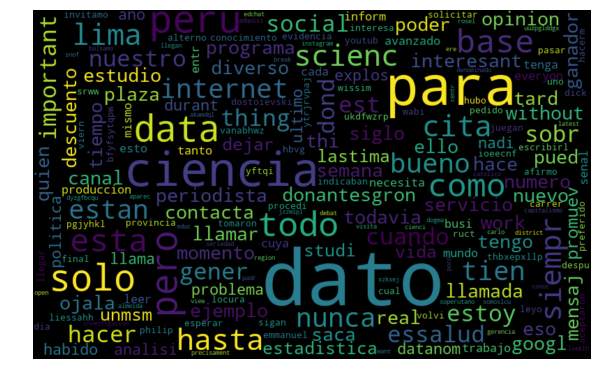

In [53]:
all_words = ' '.join([text for text in tweets_text['tidy_tweet']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()